# Duke University | ECE 685D Intro to Deep Learning | Part 8: Linear Factor Models

# PCA

## Theoretical Formulation

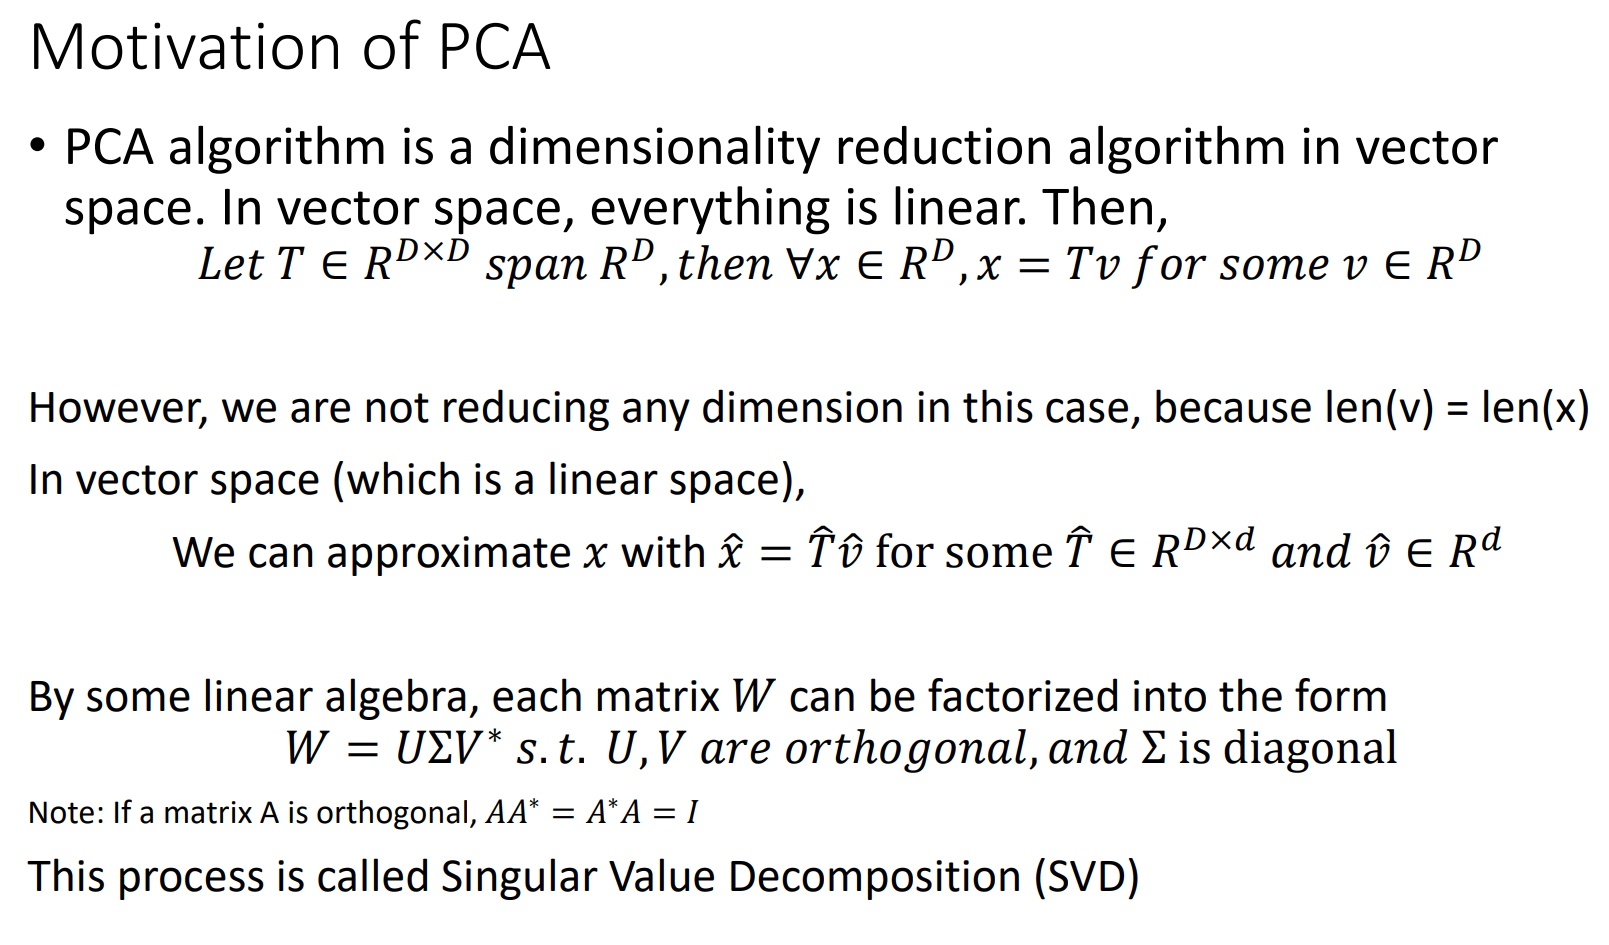

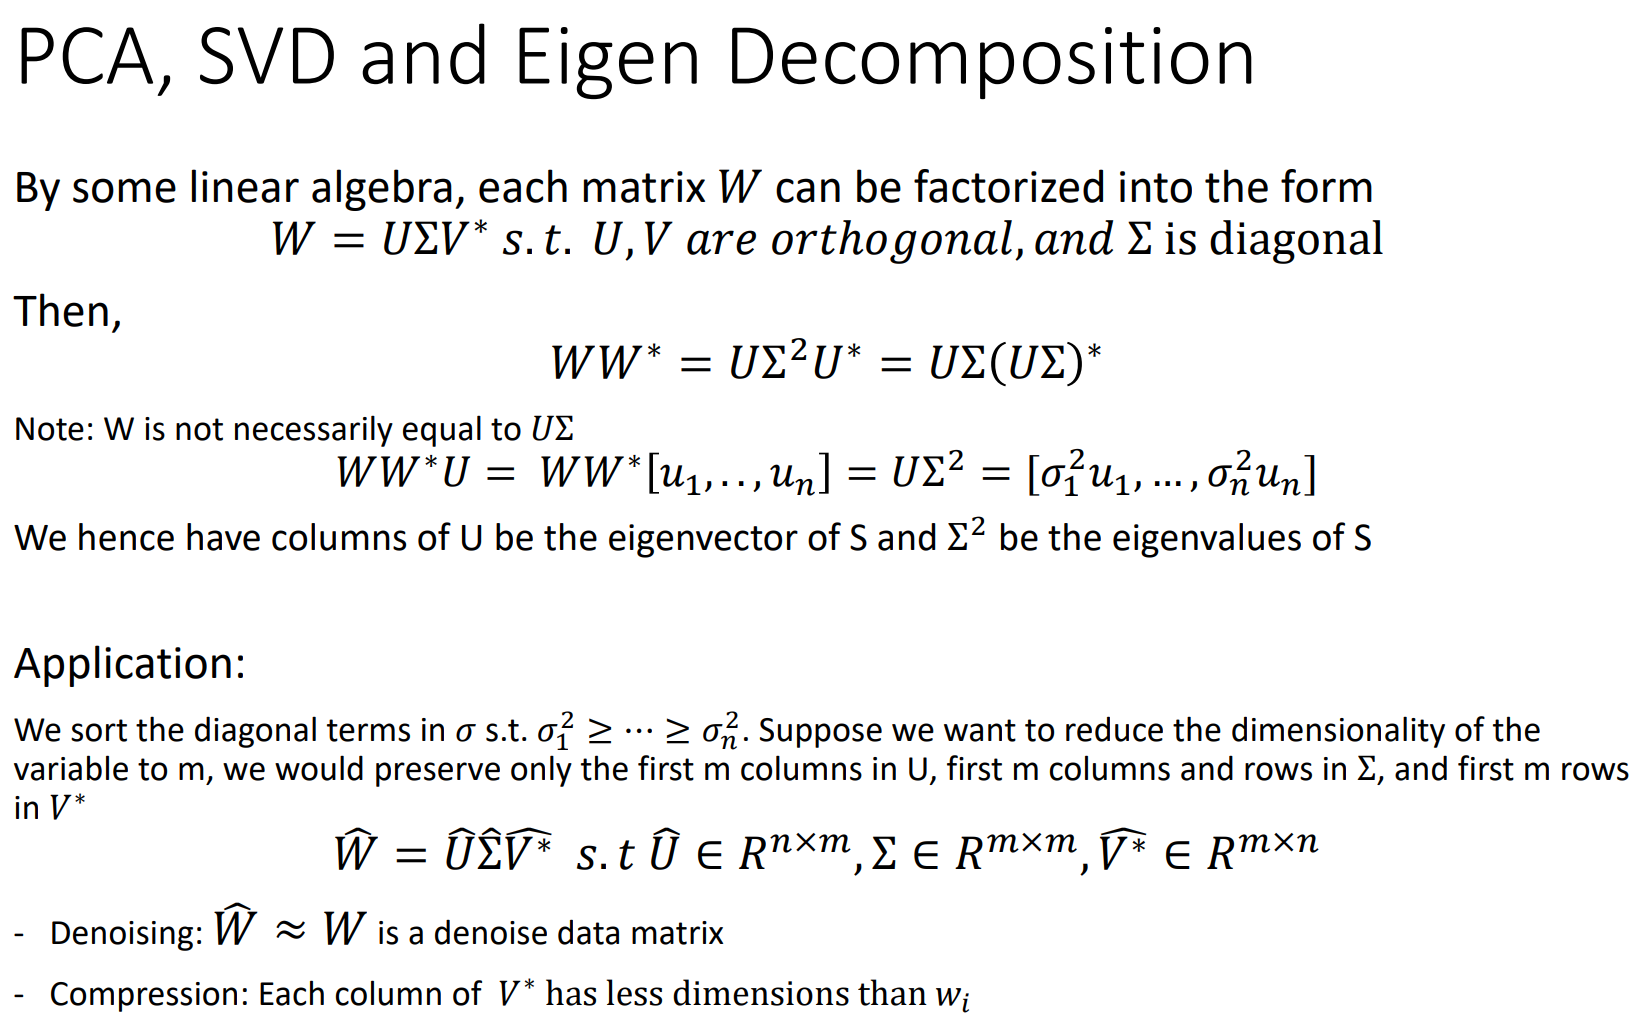

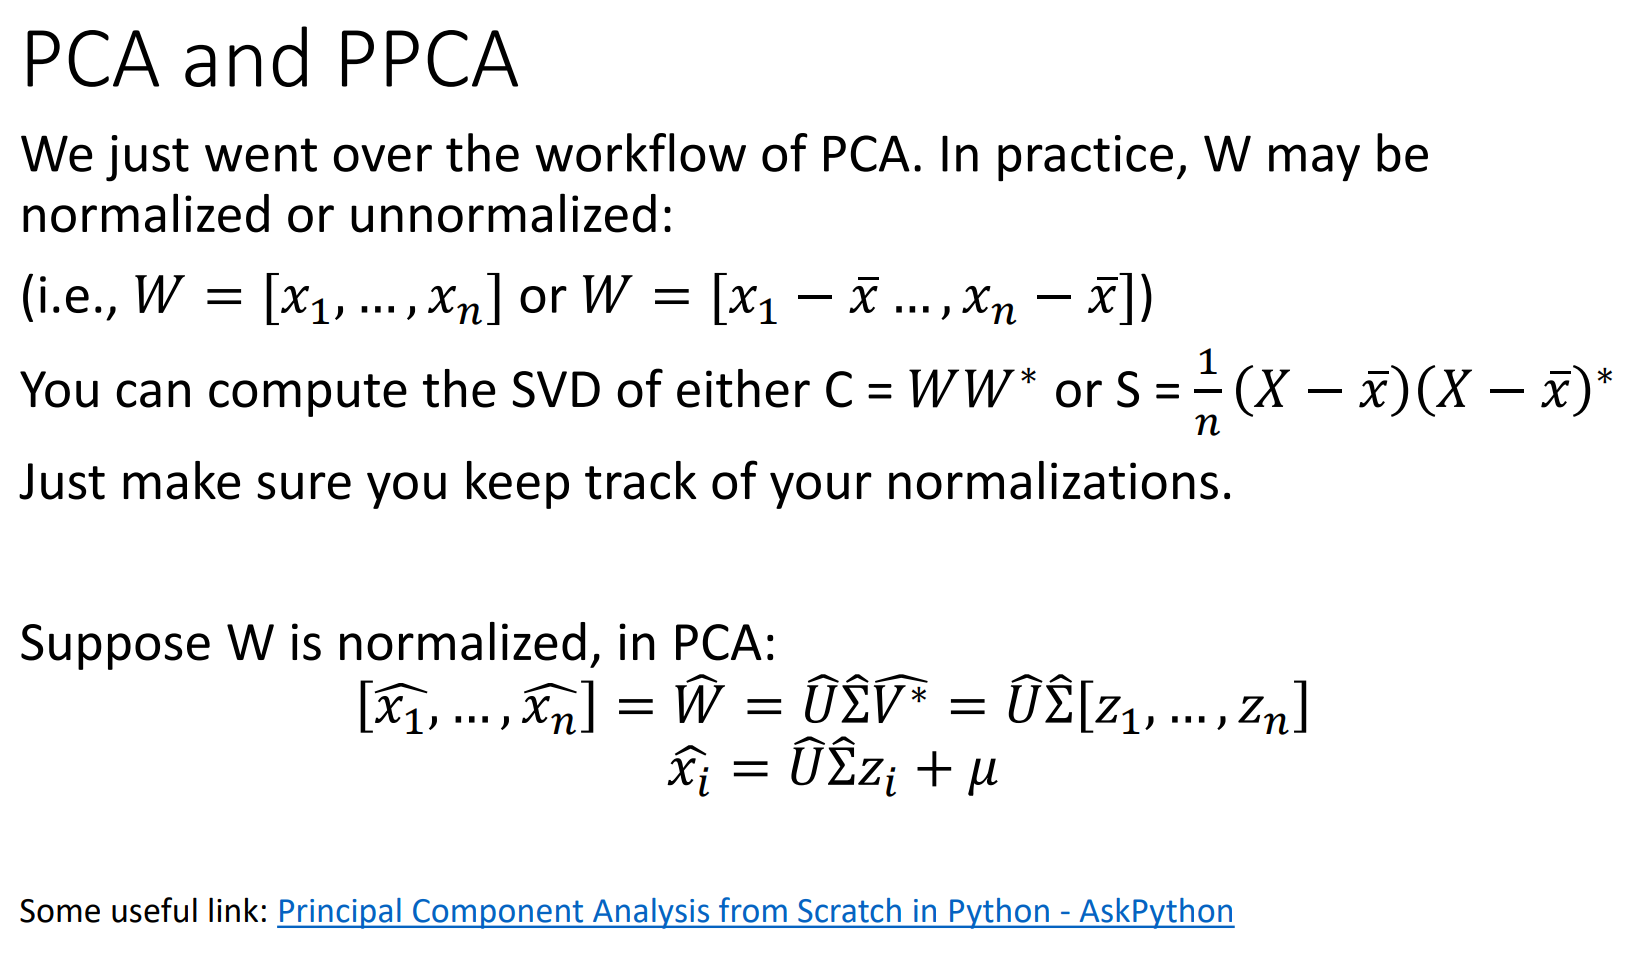

## Implementation (and Example)

In [24]:
# code adapted from Abhishek Wasnik's Oct. 19, 2020 AskPython article "Principal Component Analysis from Scratch in Python" (see https://www.askpython.com/python/examples/principal-component-analysis)
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


def PCA(X , num_components):

    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

def iris_pca():
    #Get the IRIS dataset
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

    #prepare the data
    x = data.iloc[:,0:4]

    print("Analysis in original data space #########################################################################")
    # visualize the (raw) data
    plt.figure()
    sb.scatterplot(data = data , x = 'sepal length', y=np.random.uniform(-1,1,150) , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'sepal width', y=np.random.uniform(-1,1,150) , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'petal length', y=np.random.uniform(-1,1,150) , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'petal width', y=np.random.uniform(-1,1,150) , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()

    print("Analysis comparing individual features ##################################################################")
    plt.figure()
    sb.scatterplot(data = data , x = 'sepal length',y = 'sepal width' , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'sepal length',y = 'petal length' , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'sepal length',y = 'petal width' , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'sepal width',y = 'petal length' , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'sepal width',y = 'petal width' , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()
    plt.figure()
    sb.scatterplot(data = data , x = 'petal length',y = 'petal width' , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()

    print("Analysis via first 2 principle components ###############################################################")
    #prepare the target
    target = data.iloc[:,4]

    #Applying it to PCA function
    mat_reduced = PCA(x , 2)

    #Creating a Pandas DataFrame of reduced Dataset
    principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

    #Concat it with target variable to create a complete Dataset
    principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

    plt.figure(figsize = (6,6))
    sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire', alpha=0.5)
    plt.show()



Analysis in original data space #########################################################################


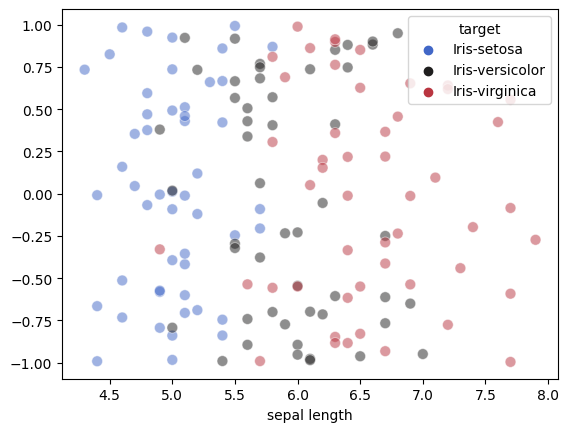

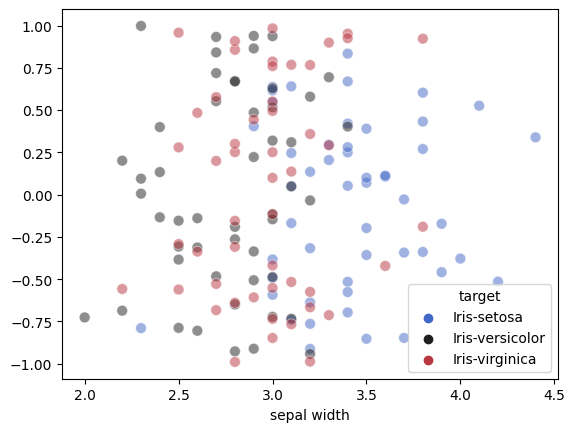

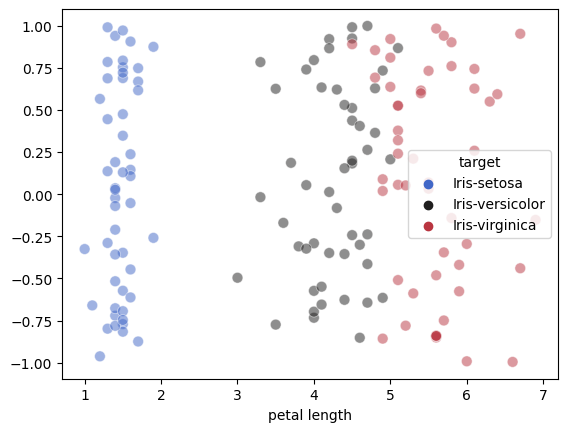

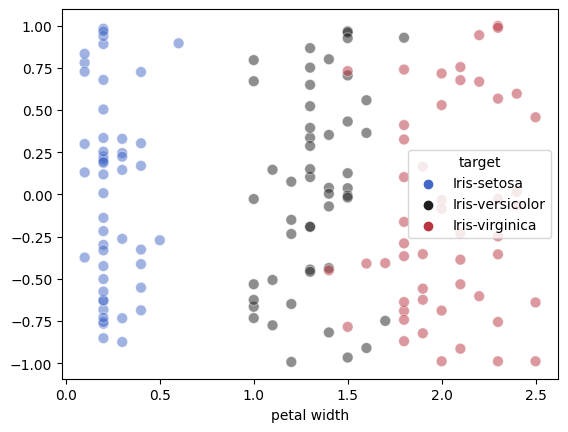

Analysis comparing individual features ##################################################################


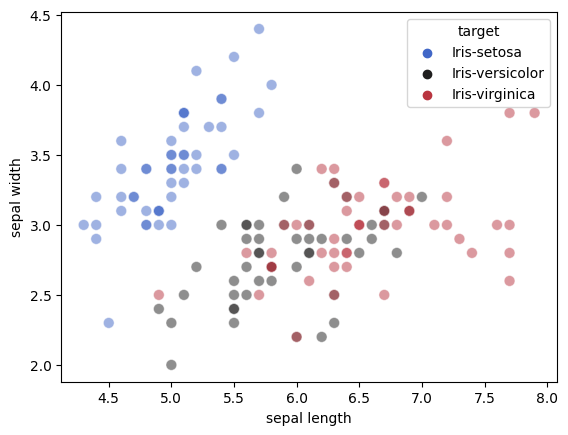

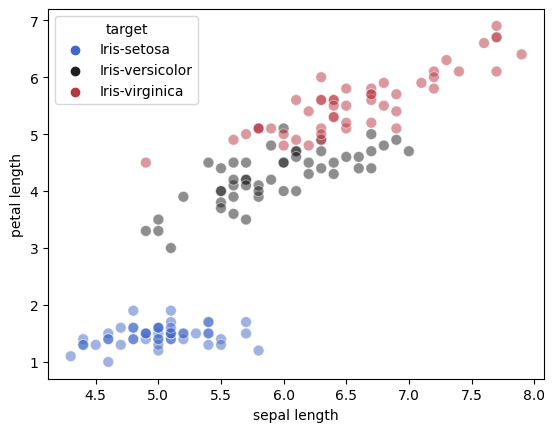

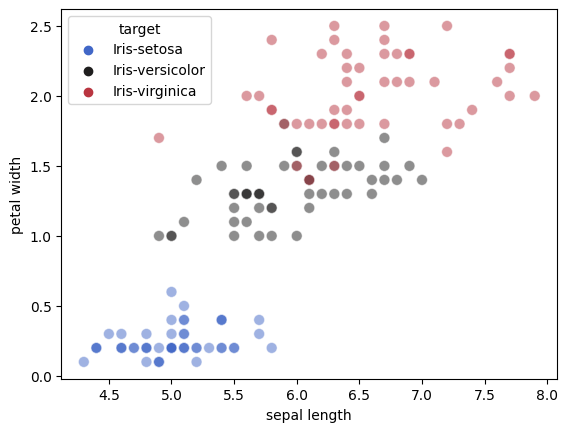

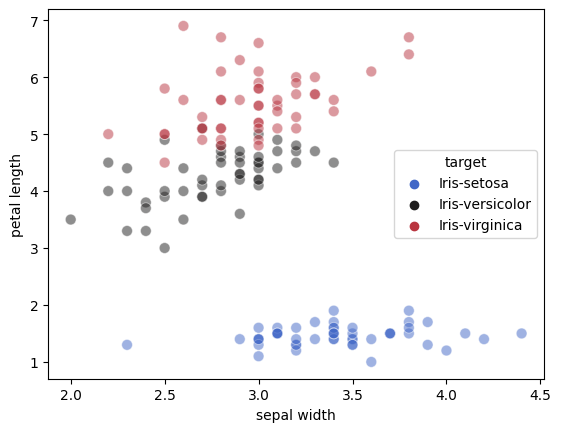

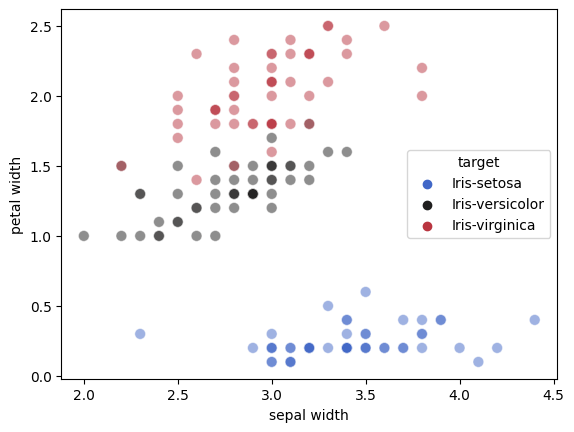

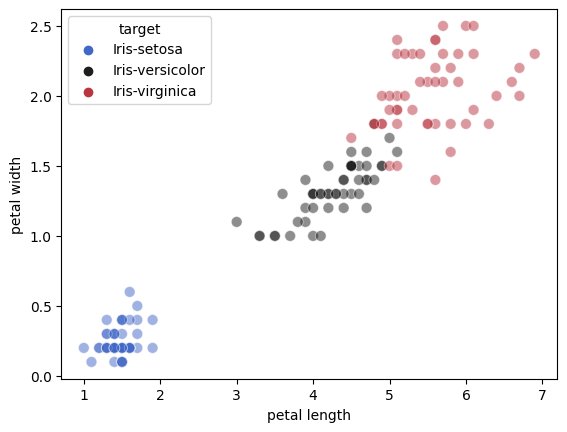

Analysis via first 2 principle components ###############################################################


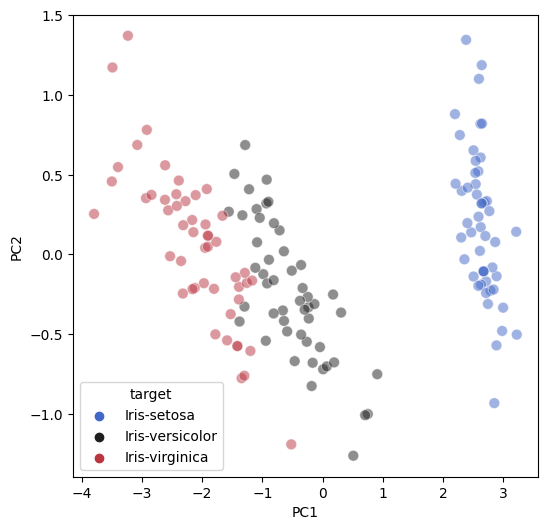

In [25]:
iris_pca()

## Discussion

**Pros of PCA**

*   Reduced dimensionality -> faster (tractable) analysis
*   Reduced dimensionality -> more robust to noise
*   Easy to interpret / theoretically justify


**Cons of PCA**
*    Need to compute SVD to make prediction / 'train' principal components, which may be intractable for large datasets
*    May still need many principal components to capture sufficient variance in data
*    Linear combinations of linear features -> only captures linear decision boundaries
*    Components are all orthogonal, which may not reflect reality

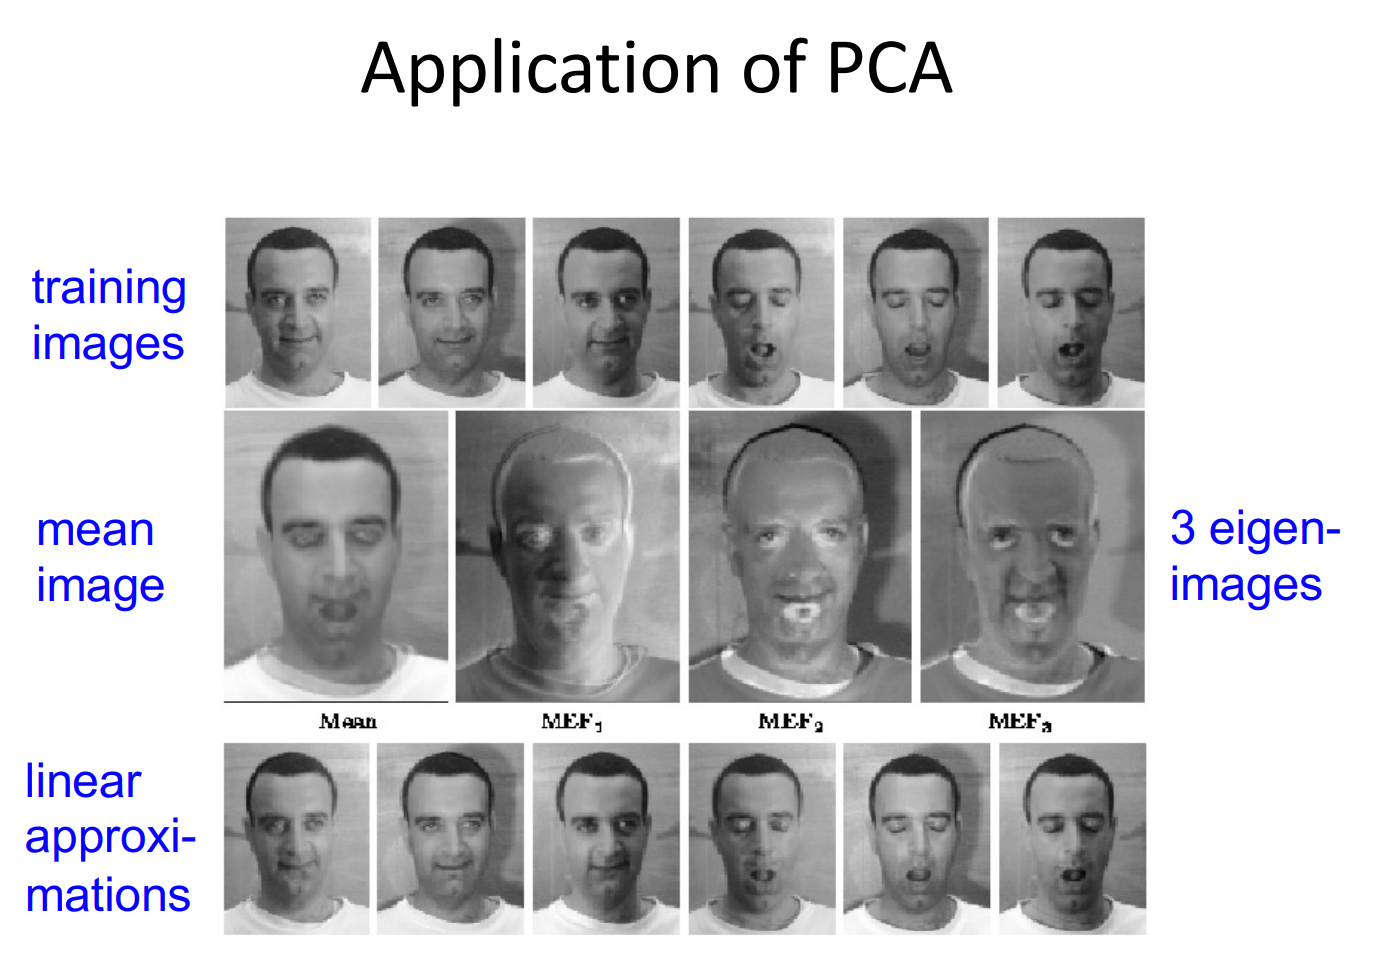

# PPCA

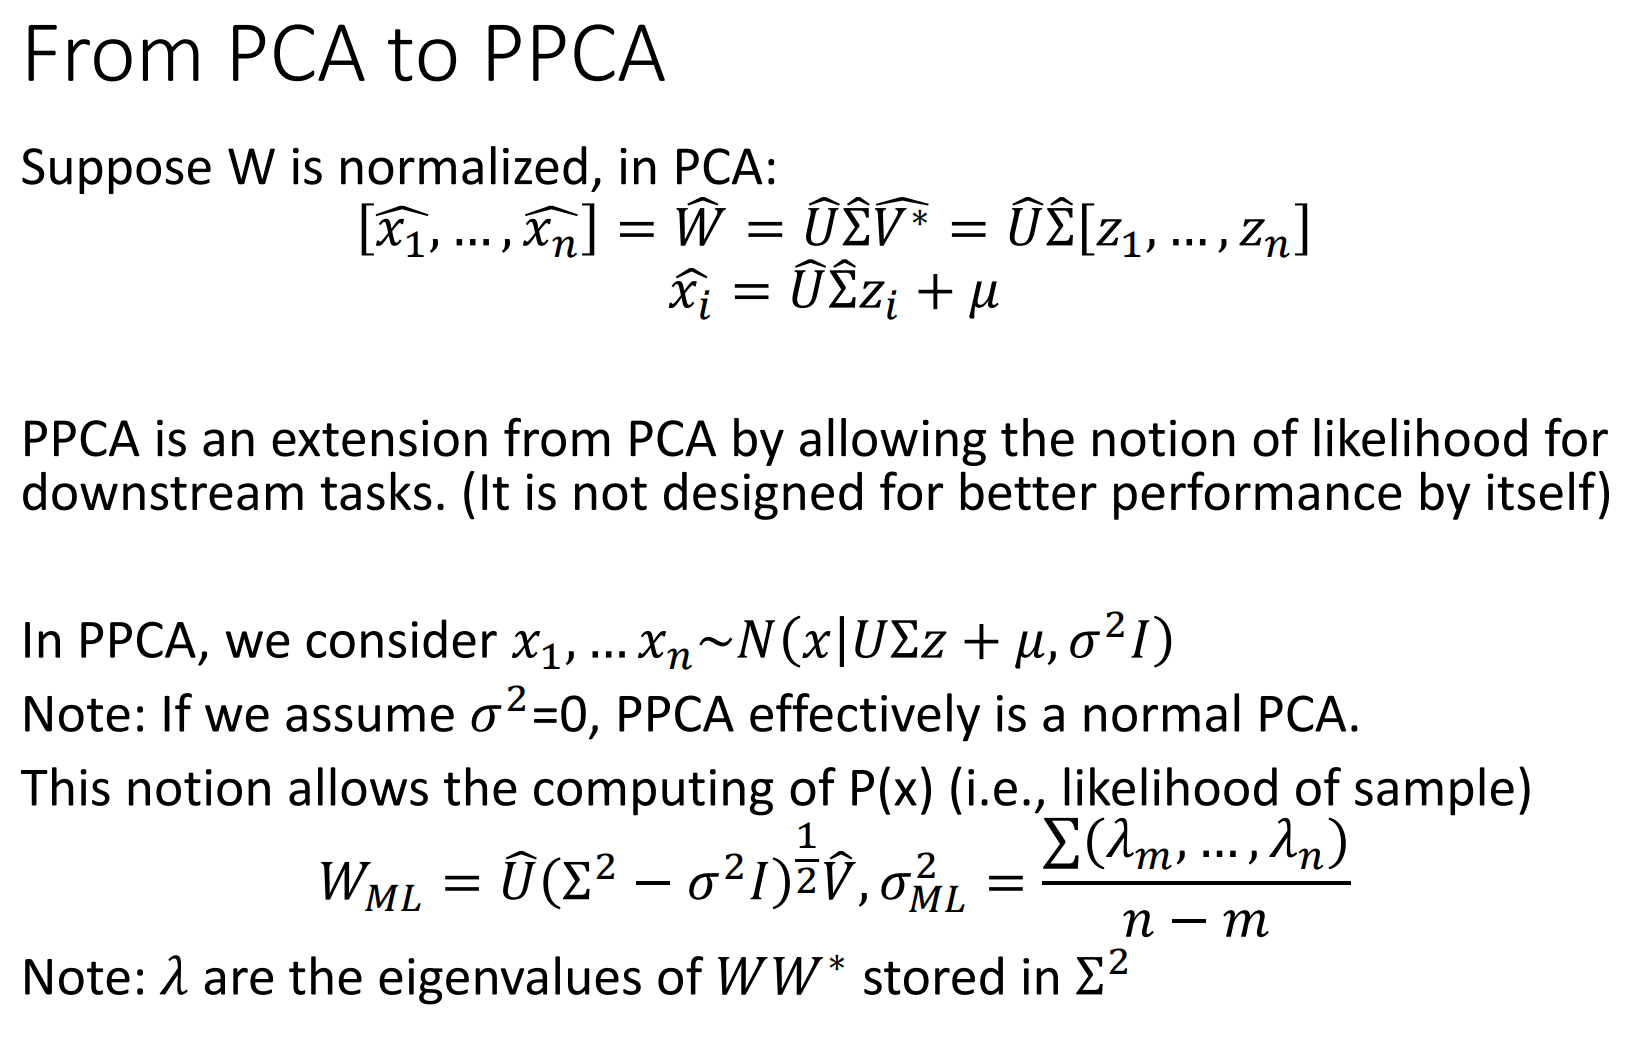

# ICA

## Material from 2022

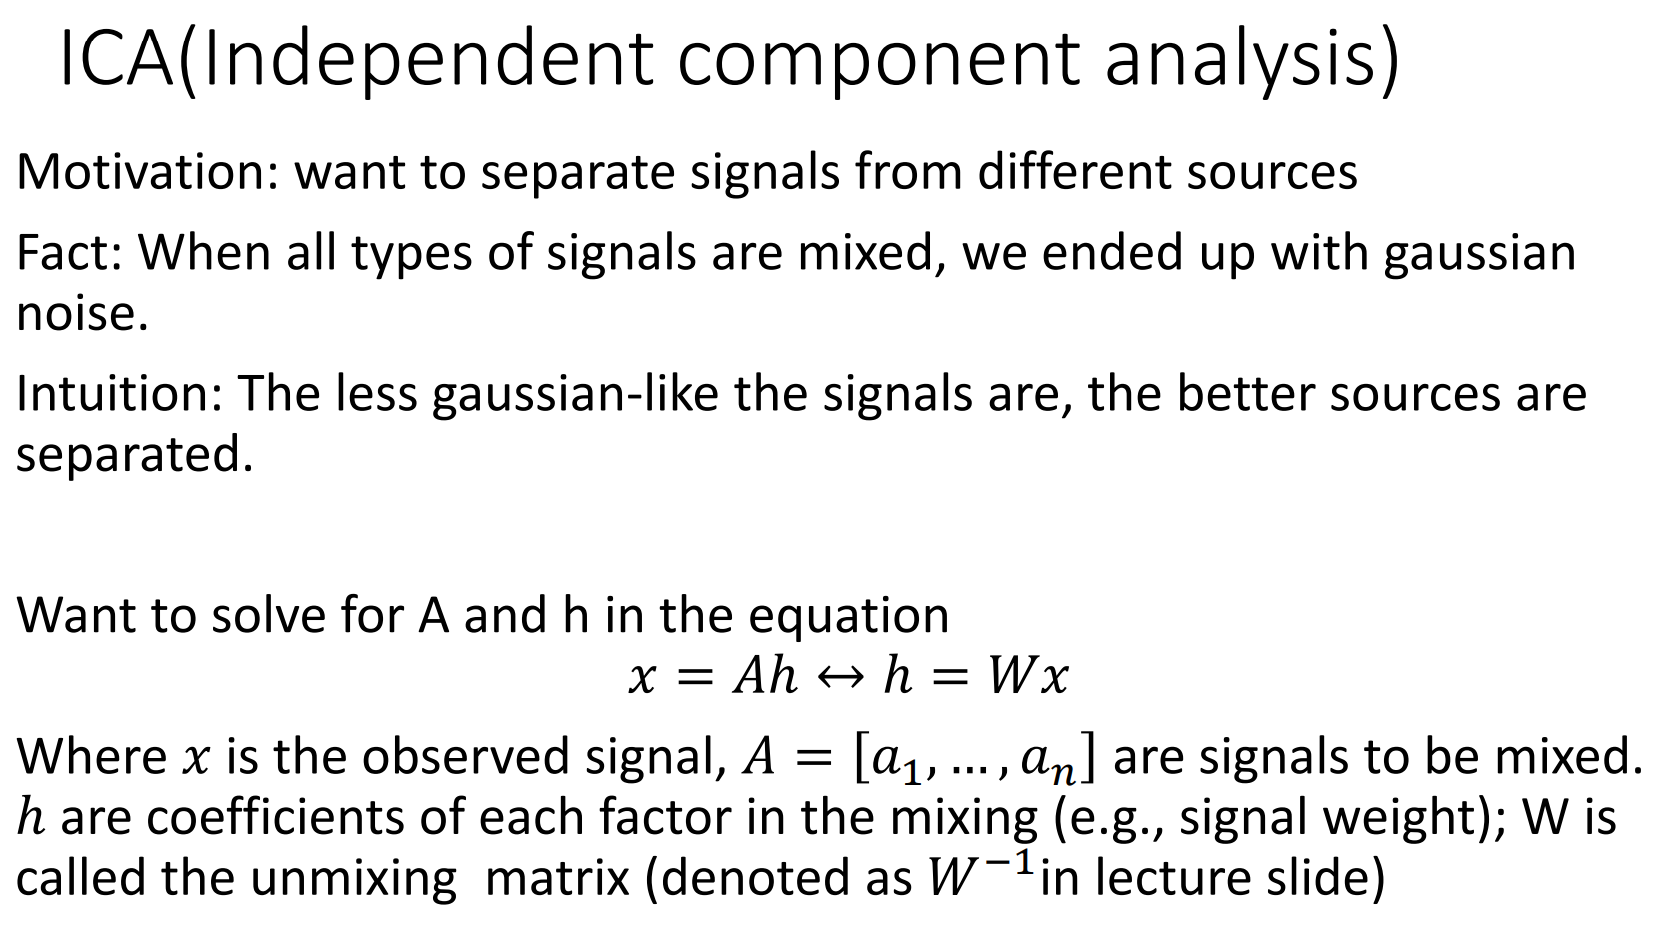

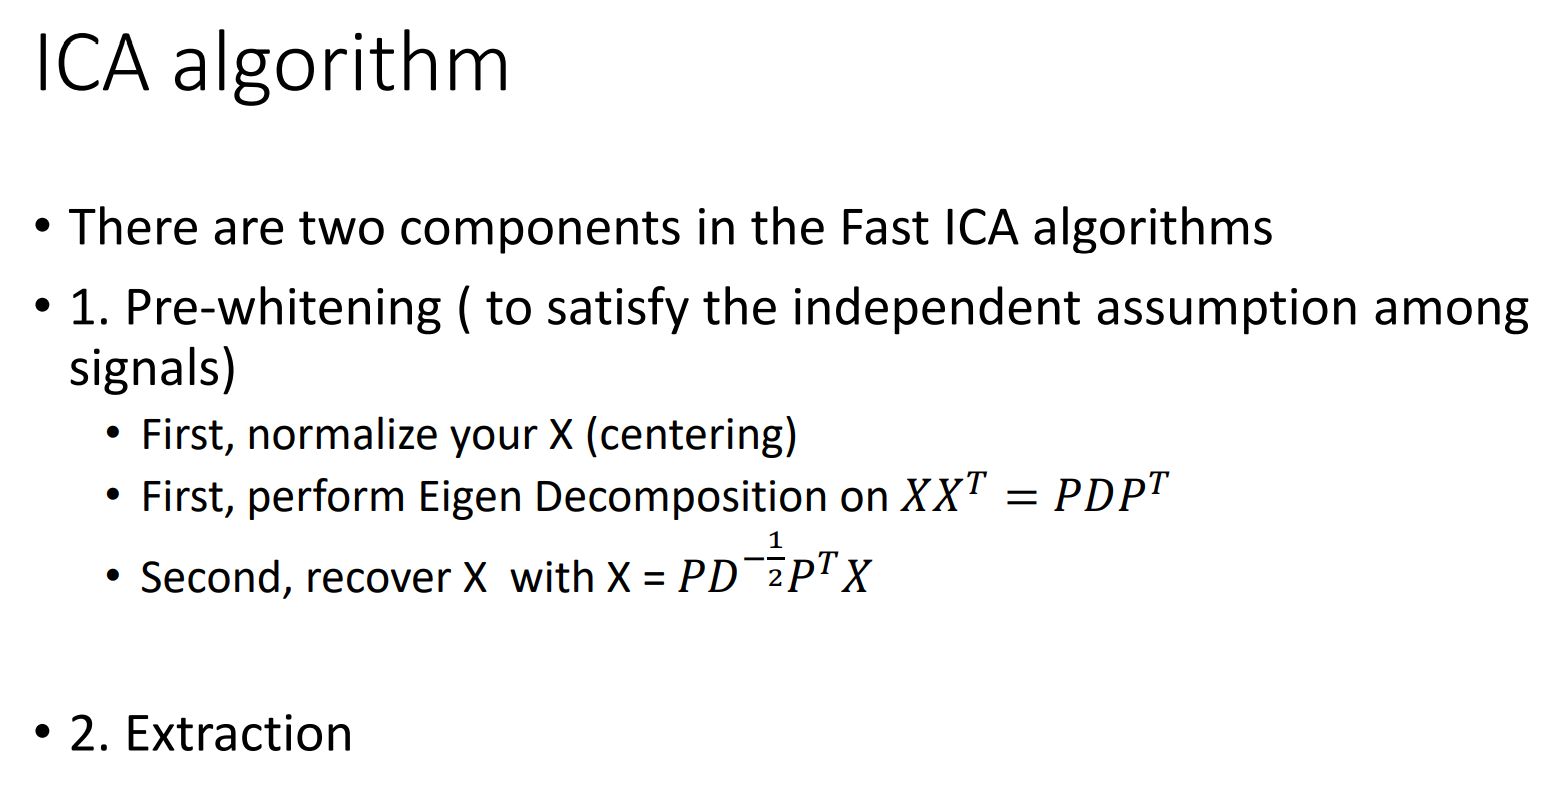

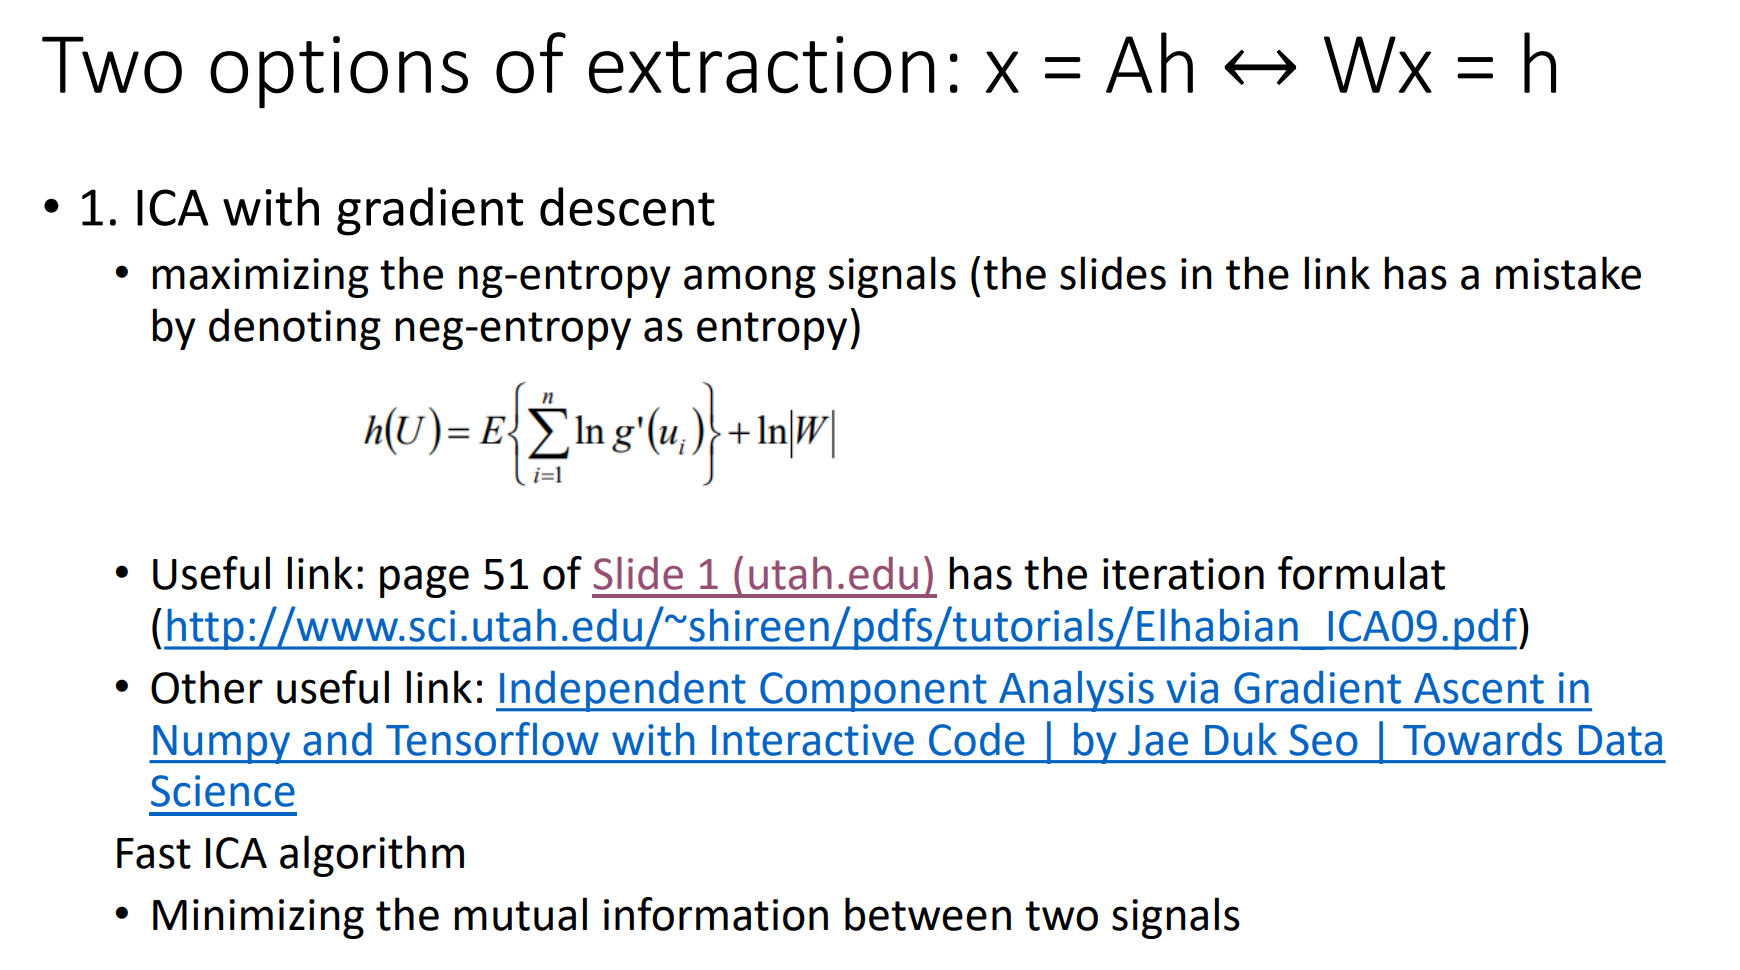

## Independent_Component_Analysis Github Repo

see https://github.com/akcarsten/Independent_Component_Analysis/tree/master for source material (particularly the associated jupyter notebook https://github.com/akcarsten/Independent_Component_Analysis/blob/master/Independent_component_analysis.ipynb )


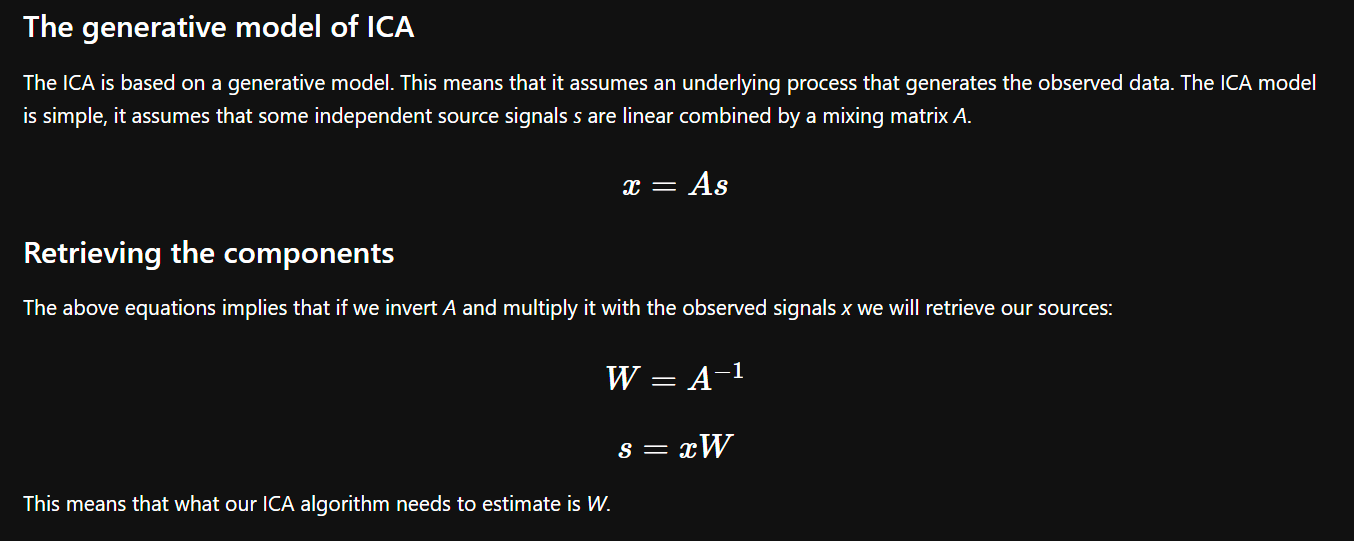

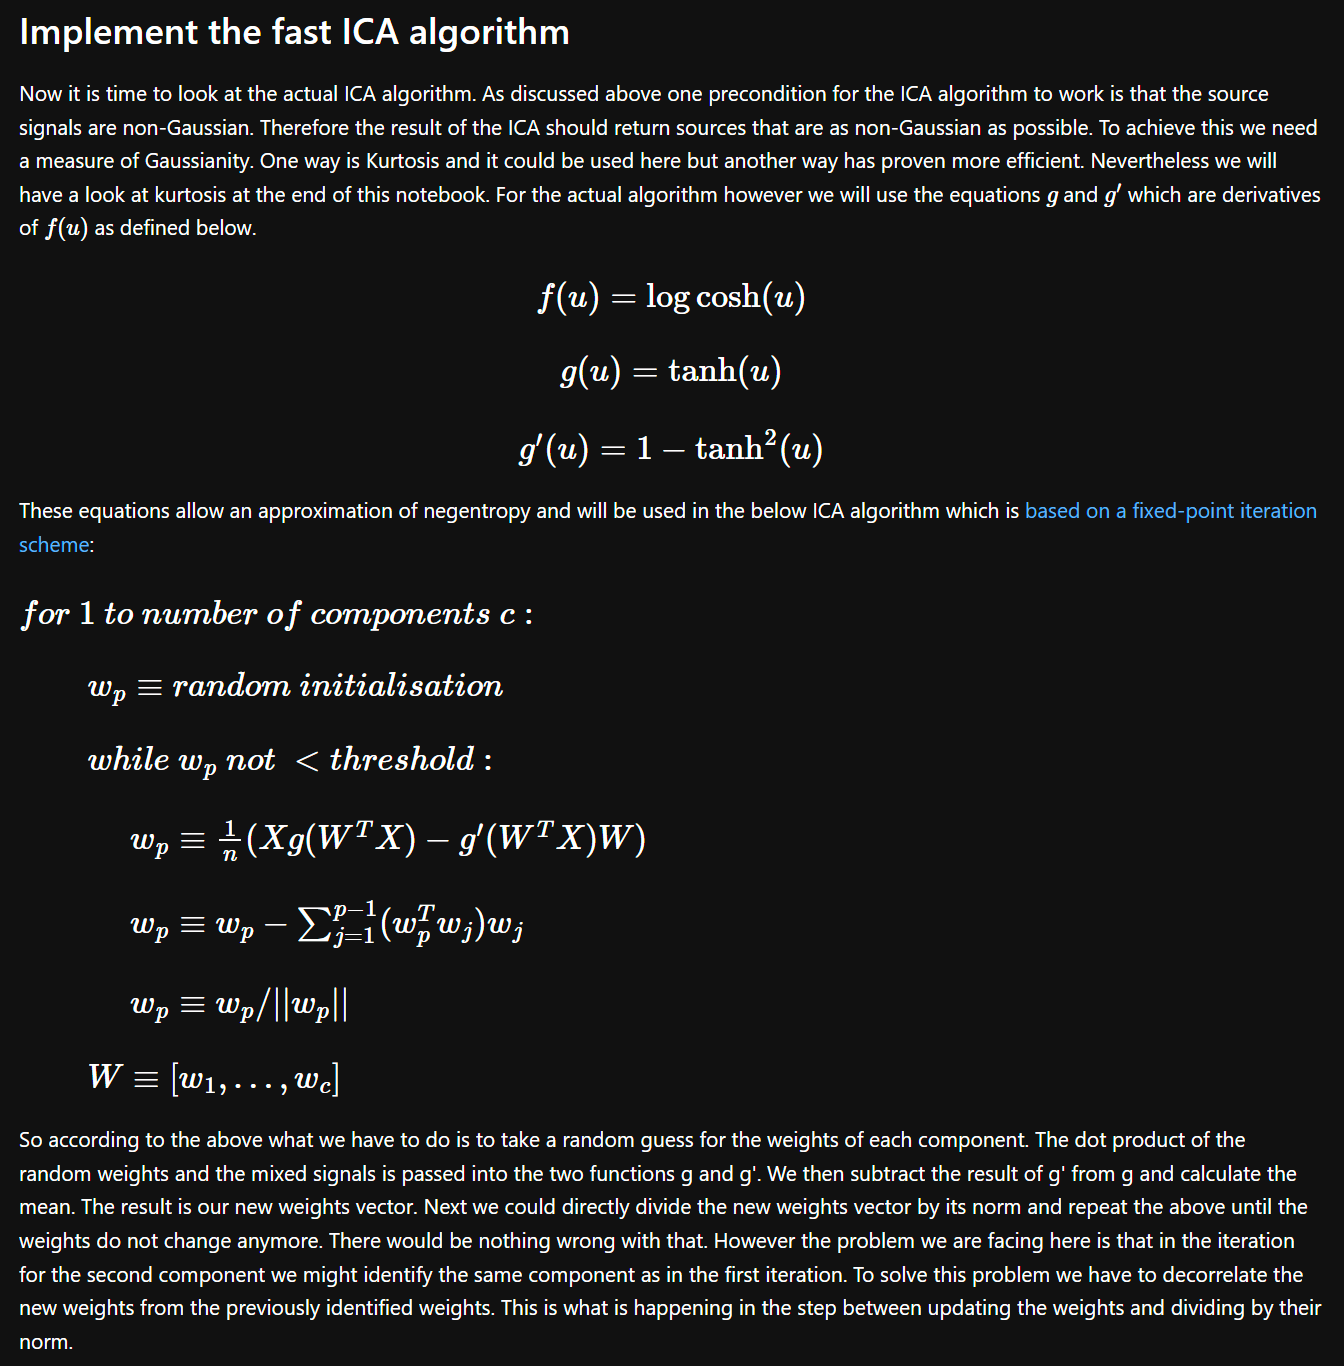

In [29]:
# code adapted from https://github.com/akcarsten/Independent_Component_Analysis/tree/master
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Enable plots inside the Jupyter NotebookLet the
%matplotlib inline



def generate_synthetic_singals(random_seed=23):
    # Set a seed for the random number generator for reproducibility
    np.random.seed(random_seed)
    # Number of samples
    ns = np.linspace(0, 200, 1000)

    # Source matrix
    S = np.array([np.sin(ns * 1),
                signal.sawtooth(ns * 1.9),
                np.random.random(len(ns))]).T
    # Mixing matrix
    A = np.array([[0.5, 1, 0.2],
                [1, 0.5, 0.4],
                [0.5, 0.8, 1]])
    # Mixed signal matrix
    X = S.dot(A).T

    # Plot sources & signals
    fig, ax = plt.subplots(1, 1, figsize=[18, 5])
    ax.plot(ns, S, lw=5)
    ax.set_xticks([])
    ax.set_yticks([-1, 1])
    ax.set_xlim(ns[0], ns[200])
    ax.tick_params(labelsize=12)
    ax.set_title('Independent sources', fontsize=25)

    fig, ax = plt.subplots(3, 1, figsize=[18, 5], sharex=True)
    ax[0].plot(ns, X[0], lw=5)
    ax[0].set_title('Mixed signals', fontsize=25)
    ax[0].tick_params(labelsize=12)
    ax[1].plot(ns, X[1], lw=5)
    ax[1].tick_params(labelsize=12)
    ax[1].set_xlim(ns[0], ns[-1])
    ax[2].plot(ns, X[2], lw=5)
    ax[2].tick_params(labelsize=12)
    ax[2].set_xlim(ns[0], ns[-1])
    ax[2].set_xlabel('Sample number', fontsize=20)
    ax[2].set_xlim(ns[0], ns[200])

    plt.show()

    return X, A, S


def compare_gaussian_to_nongaussian_signals():
    # Define two non-gaussian uniform components
    s1 = np.random.rand(1000)
    s2 = np.random.rand(1000)
    s = np.array(([s1, s2]))

    # Define two gaussian components
    s1n = np.random.normal(size=1000)
    s2n = np.random.normal(size=1000)
    sn = np.array(([s1n, s2n]))

    # Define orthogonal mixing matrix
    A = np.array(([0.96, -0.28],[0.28, 0.96]))

    # Mix signals
    mixedSignals = s.T.dot(A)
    mixedSignalsN = sn.T.dot(A)

    # Plot results
    fig, ax = plt.subplots(2, 2, figsize=[18, 10])
    ax[0][0].scatter(s[0], s[1])
    ax[0][0].tick_params(labelsize=12)
    ax[0][0].set_title('Sources (non-Gaussian)', fontsize=25)
    ax[0][0].set_xlim([-0.25, 1.5])
    ax[0][0].set_xticks([])

    ax[0][1].scatter(sn[0], sn[1])
    ax[0][1].tick_params(labelsize=12)
    ax[0][1].set_title('Sources (Gaussian)', fontsize=25)
    ax[0][1].set_xlim([-4, 4])
    ax[0][1].set_xticks([])
    ax[0][1].set_yticks([])

    ax[1][0].scatter(mixedSignals.T[0], mixedSignals.T[1])
    ax[1][0].tick_params(labelsize=12)
    ax[1][0].set_title('Mixed signals (non-Gaussian sources)', fontsize=25)
    ax[1][0].set_xlim([-0.25, 1.5])

    ax[1][1].scatter(mixedSignalsN.T[0], mixedSignalsN.T[1])
    ax[1][1].tick_params(labelsize=12)
    ax[1][1].set_title('Mixed signals (Gaussian sources)', fontsize=25)
    ax[1][1].set_xlim([-4, 4])
    ax[1][1].set_yticks([])

    plt.show()
    pass


def visualize_synthetic_signals_properties(X, S):
    fig, ax = plt.subplots(1, 2, figsize=[18, 5])
    ax[0].scatter(S.T[0], S.T[1], c=S.T[2])
    ax[0].tick_params(labelsize=12)
    ax[0].set_yticks([-1, 0, 1])
    ax[0].set_xticks([-1, 0, 1])
    ax[0].set_xlabel('signal 1', fontsize=20)
    ax[0].set_ylabel('signal 2', fontsize=20)
    ax[0].set_title('Sources', fontsize=25)

    ax[1].scatter(X[0], X[1], c=X[2])
    ax[1].tick_params(labelsize=12)
    ax[1].set_yticks([-1.5, 0, 1.5])
    ax[1].set_xticks([-1.5, 0, 1.5])
    ax[1].set_xlabel('signal 1', fontsize=20)
    ax[1].set_title('Mixed signals', fontsize=25)
    plt.show()
    pass


def center(x):
    mean = np.mean(x, axis=1, keepdims=True)
    centered =  x - mean
    return centered, mean


def covariance(x):
    mean = np.mean(x, axis=1, keepdims=True)
    n = np.shape(x)[1] - 1
    m = x - mean
    return (m.dot(m.T))/n


def whiten(X):
    # Calculate the covariance matrix
    coVarM = covariance(X)

    # Single value decoposition
    U, S, V = np.linalg.svd(coVarM)
    # Calculate diagonal matrix of eigenvalues
    d = np.diag(1.0 / np.sqrt(S))

    # Calculate whitening matrix
    whiteM = np.dot(U, np.dot(d, U.T))
    # Project onto whitening matrix
    Xw = np.dot(whiteM, X)

    return Xw, whiteM


def fastIca(signals,  alpha = 1, thresh=1e-8, iterations=5000):
    m, n = signals.shape
    # Initialize random weights
    W = np.random.rand(m, m)
    for c in range(m):
            w = W[c, :].copy().reshape(m, 1)
            w = w / np.sqrt((w ** 2).sum())
            i = 0
            lim = 100
            while ((lim > thresh) & (i < iterations)):

                # Dot product of weight and signal
                ws = np.dot(w.T, signals)

                # Pass w*s into contrast function g
                wg = np.tanh(ws * alpha).T
                # Pass w*s into g prime
                wg_ = (1 - np.square(np.tanh(ws))) * alpha

                # Update weights
                wNew = (signals * wg.T).mean(axis=1) - wg_.mean() * w.squeeze()
                # Decorrelate weights
                wNew = wNew - np.dot(np.dot(wNew, W[:c].T), W[:c])
                wNew = wNew / np.sqrt((wNew ** 2).sum())

                # Calculate limit condition
                lim = np.abs(np.abs((wNew * w).sum()) - 1)

                # Update weights
                w = wNew
                # Update counter
                i += 1
            W[c, :] = w.T
    return W


def ica_demo(random_seed=23):
    X, A, S = generate_synthetic_singals(random_seed=random_seed)
    compare_gaussian_to_nongaussian_signals()
    visualize_synthetic_signals_properties(X, S)

    # PREPROCESSING BLOCK
    # Center signals
    Xc, meanX = center(X)
    # Whiten mixed signals
    Xw, whiteM = whiten(Xc)
    # Check if covariance of whitened matrix equals identity matrix
    print(np.round(covariance(Xw)))

    # ICA RUN BLOCK
    W = fastIca(Xw,  alpha=1)
    #Un-mix signals using
    unMixed = Xw.T.dot(W.T)
    # Subtract mean
    unMixed = (unMixed.T - meanX).T

    # Plot input signals (not mixed)
    fig, ax = plt.subplots(1, 1, figsize=[18, 5])
    ax.plot(S, lw=5)
    ax.tick_params(labelsize=12)
    ax.set_xticks([])
    ax.set_yticks([-1, 1])
    ax.set_title('Source signals', fontsize=25)
    ax.set_xlim(0, 100)

    fig, ax = plt.subplots(1, 1, figsize=[18, 5])
    ax.plot(unMixed, '--', label='Recovered signals', lw=5)
    ax.set_xlabel('Sample number', fontsize=20)
    ax.set_title('Recovered signals', fontsize=25)
    ax.set_xlim(0, 100)

    plt.show()
    pass

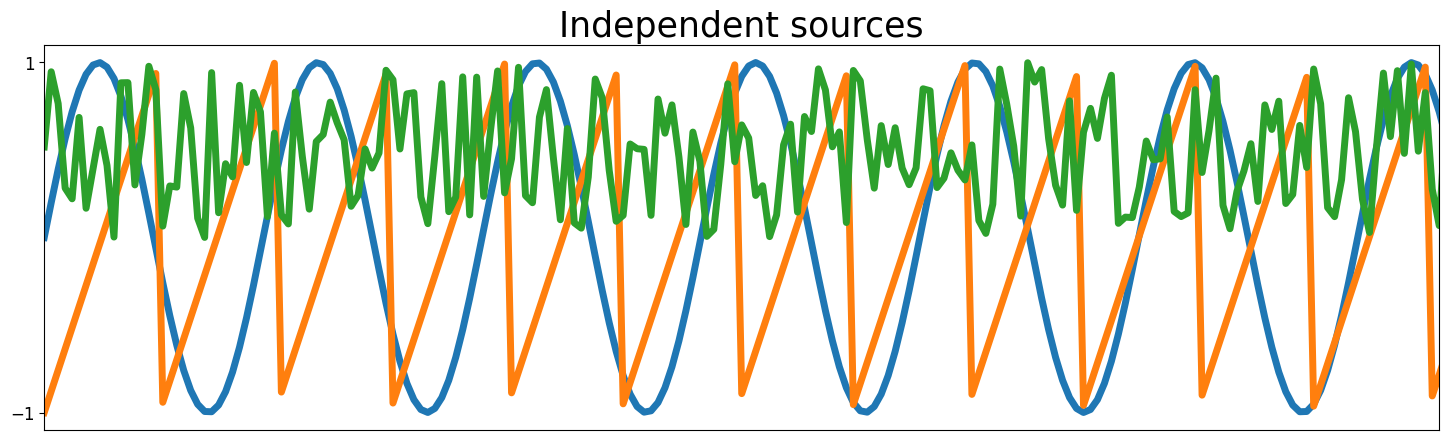

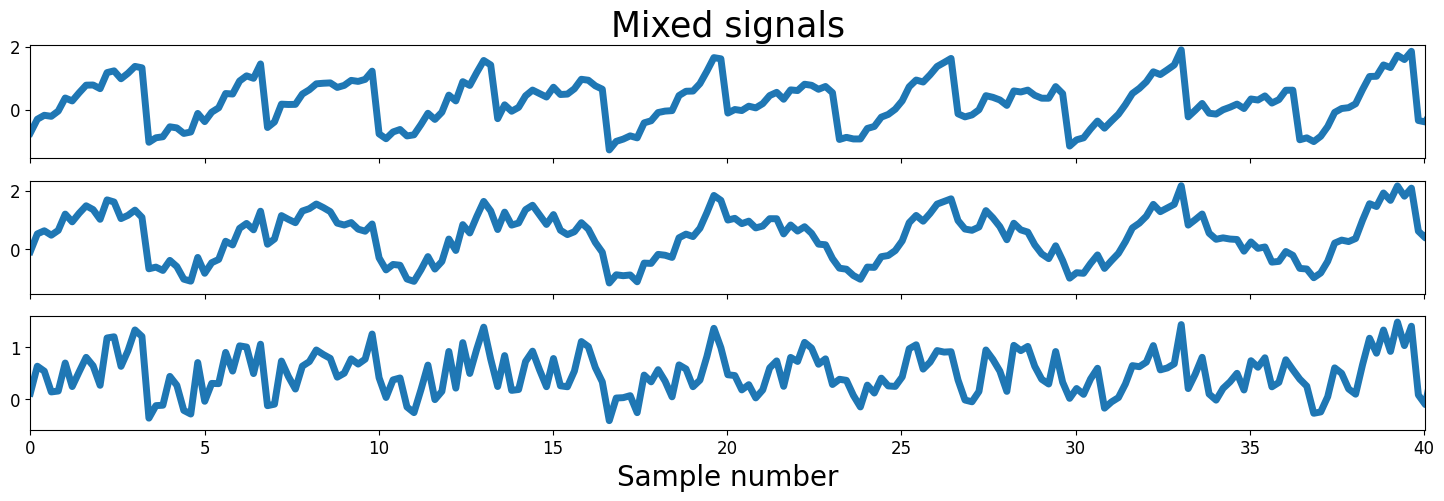

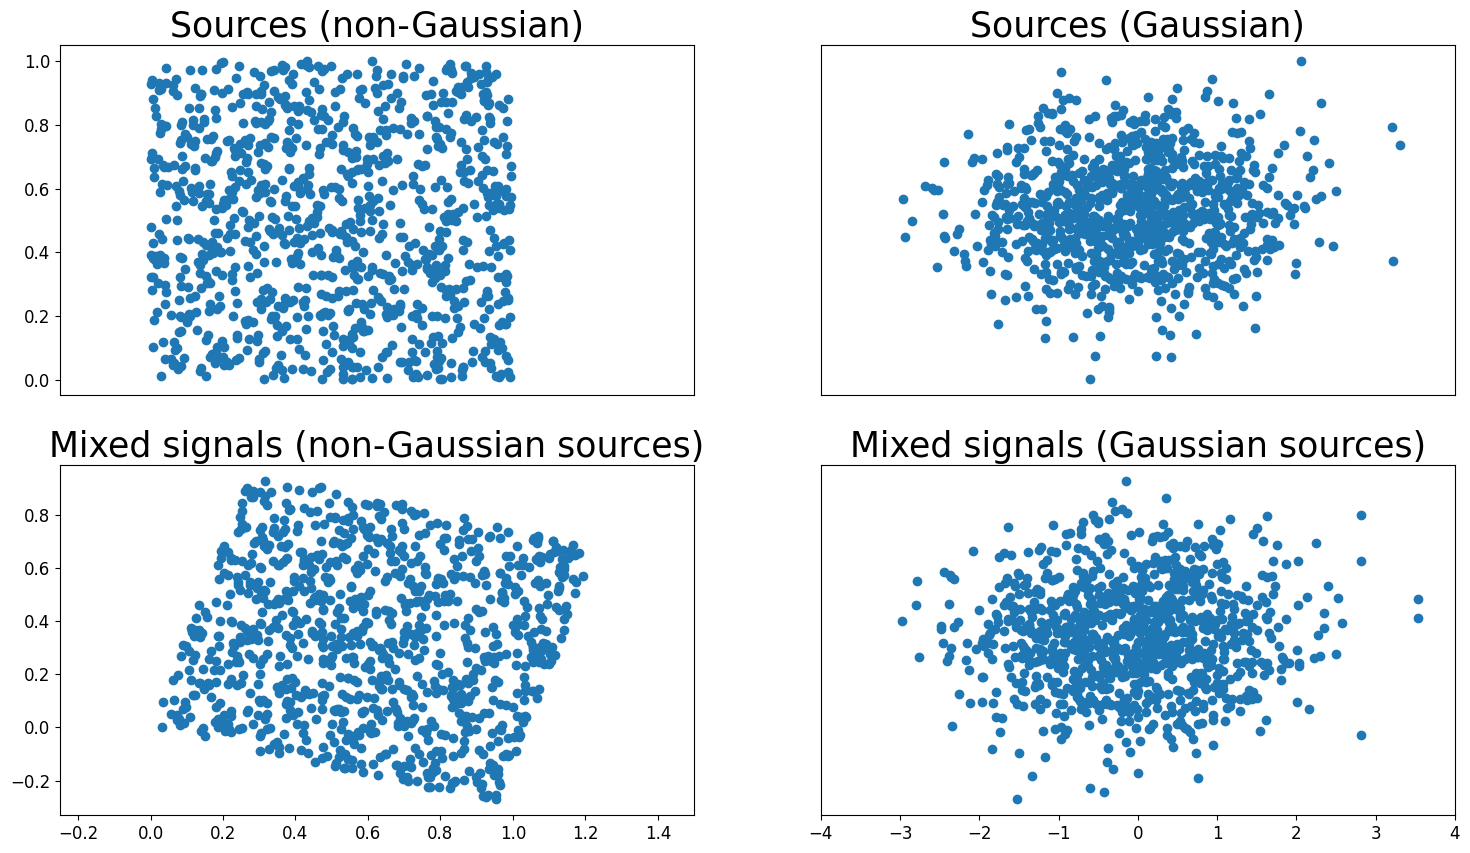

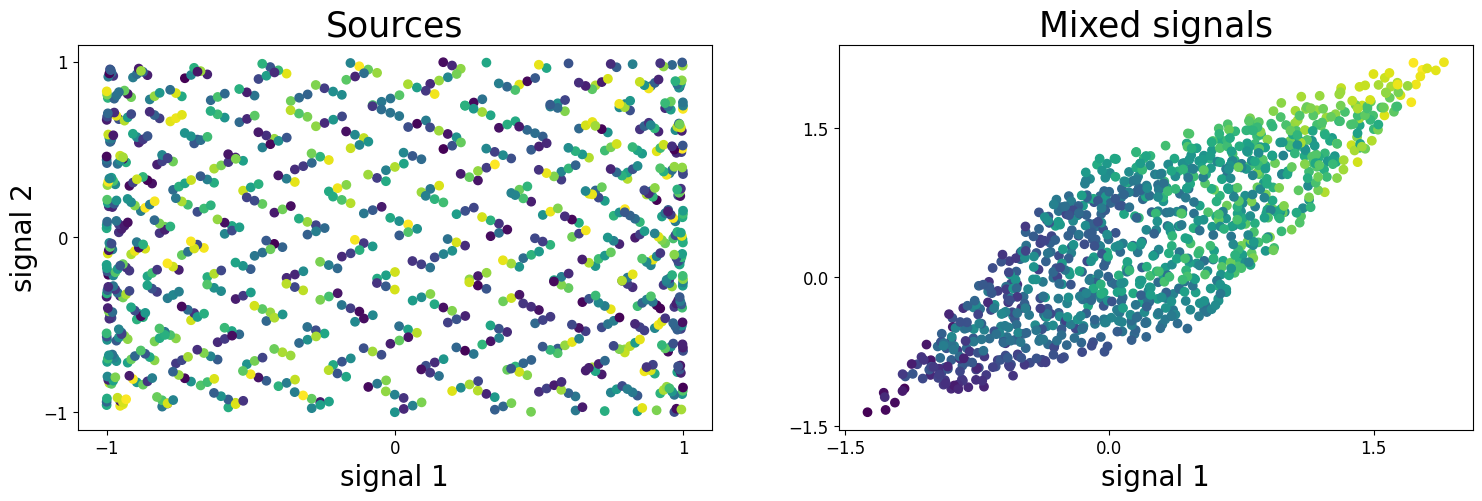

[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]


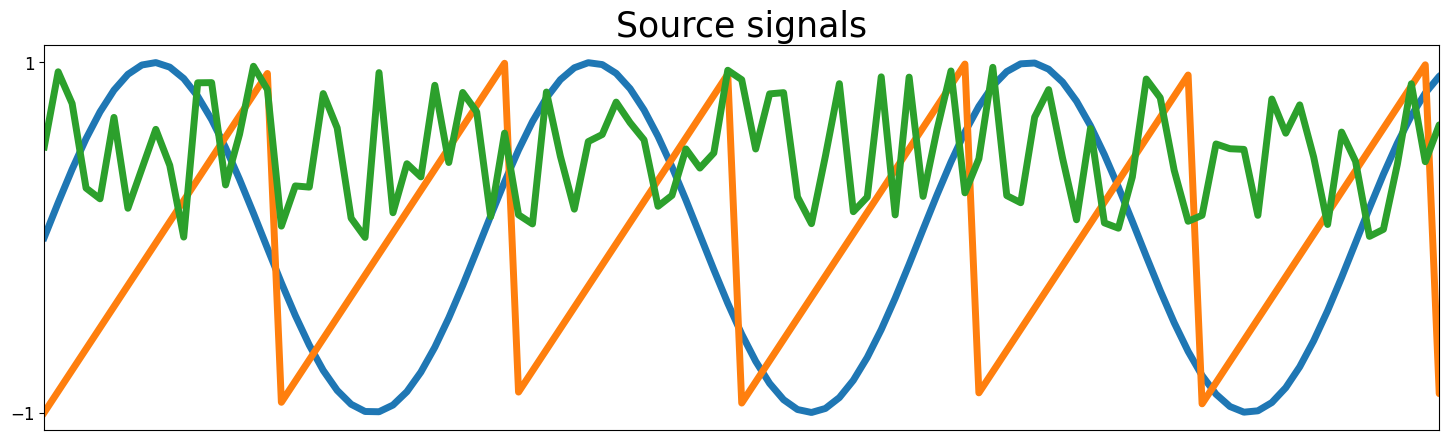

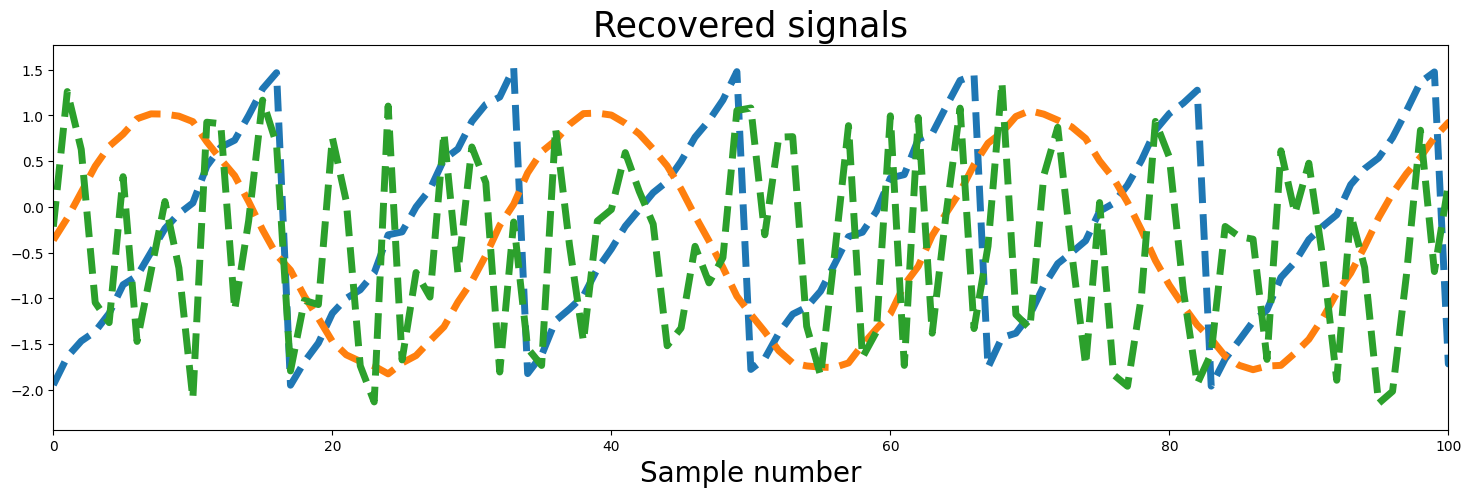

In [30]:
ica_demo(random_seed=23)

# Further Reading

# CSFA-NMF: Learning Linear Factor Models For Neuroscientific Applications

Mague, S. D., Talbot, A., Blount, C., Walder-Christensen, K. K., Duffney, L. J., Adamson, E., ... & Dzirasa, K. (2022). Brain-wide electrical dynamics encode individual appetitive social behavior. Neuron, 110(10), 1728-1741.

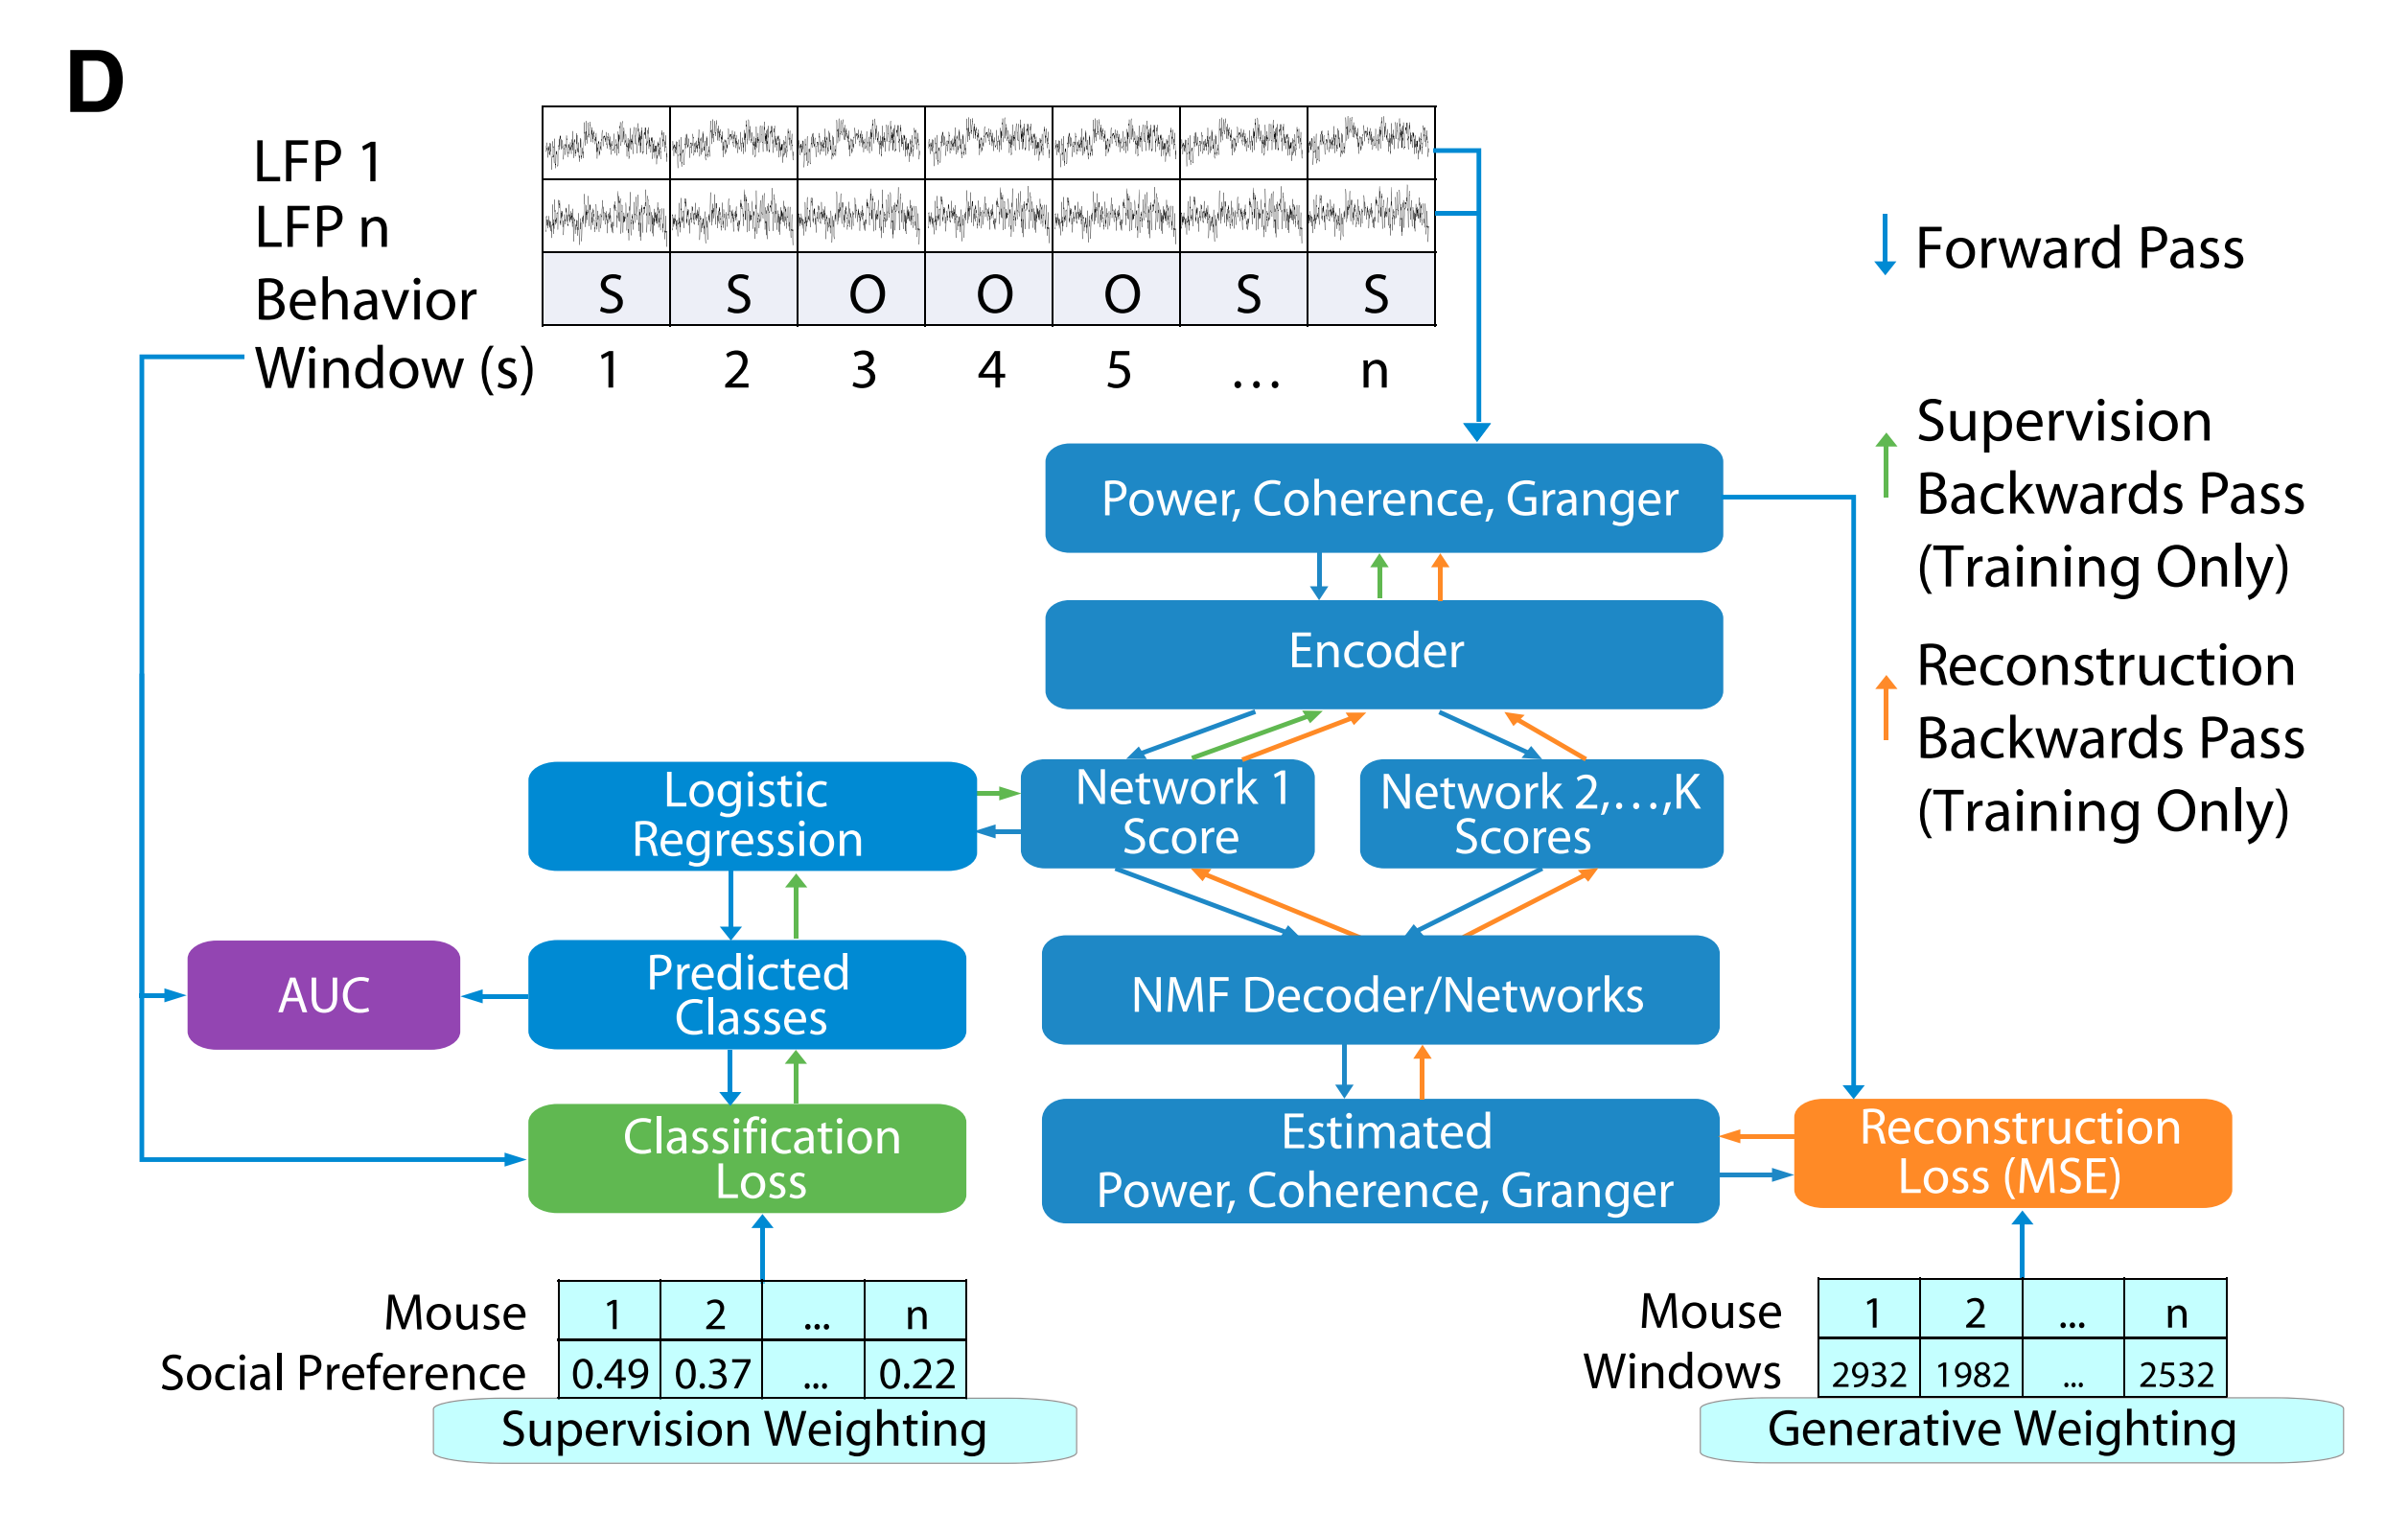

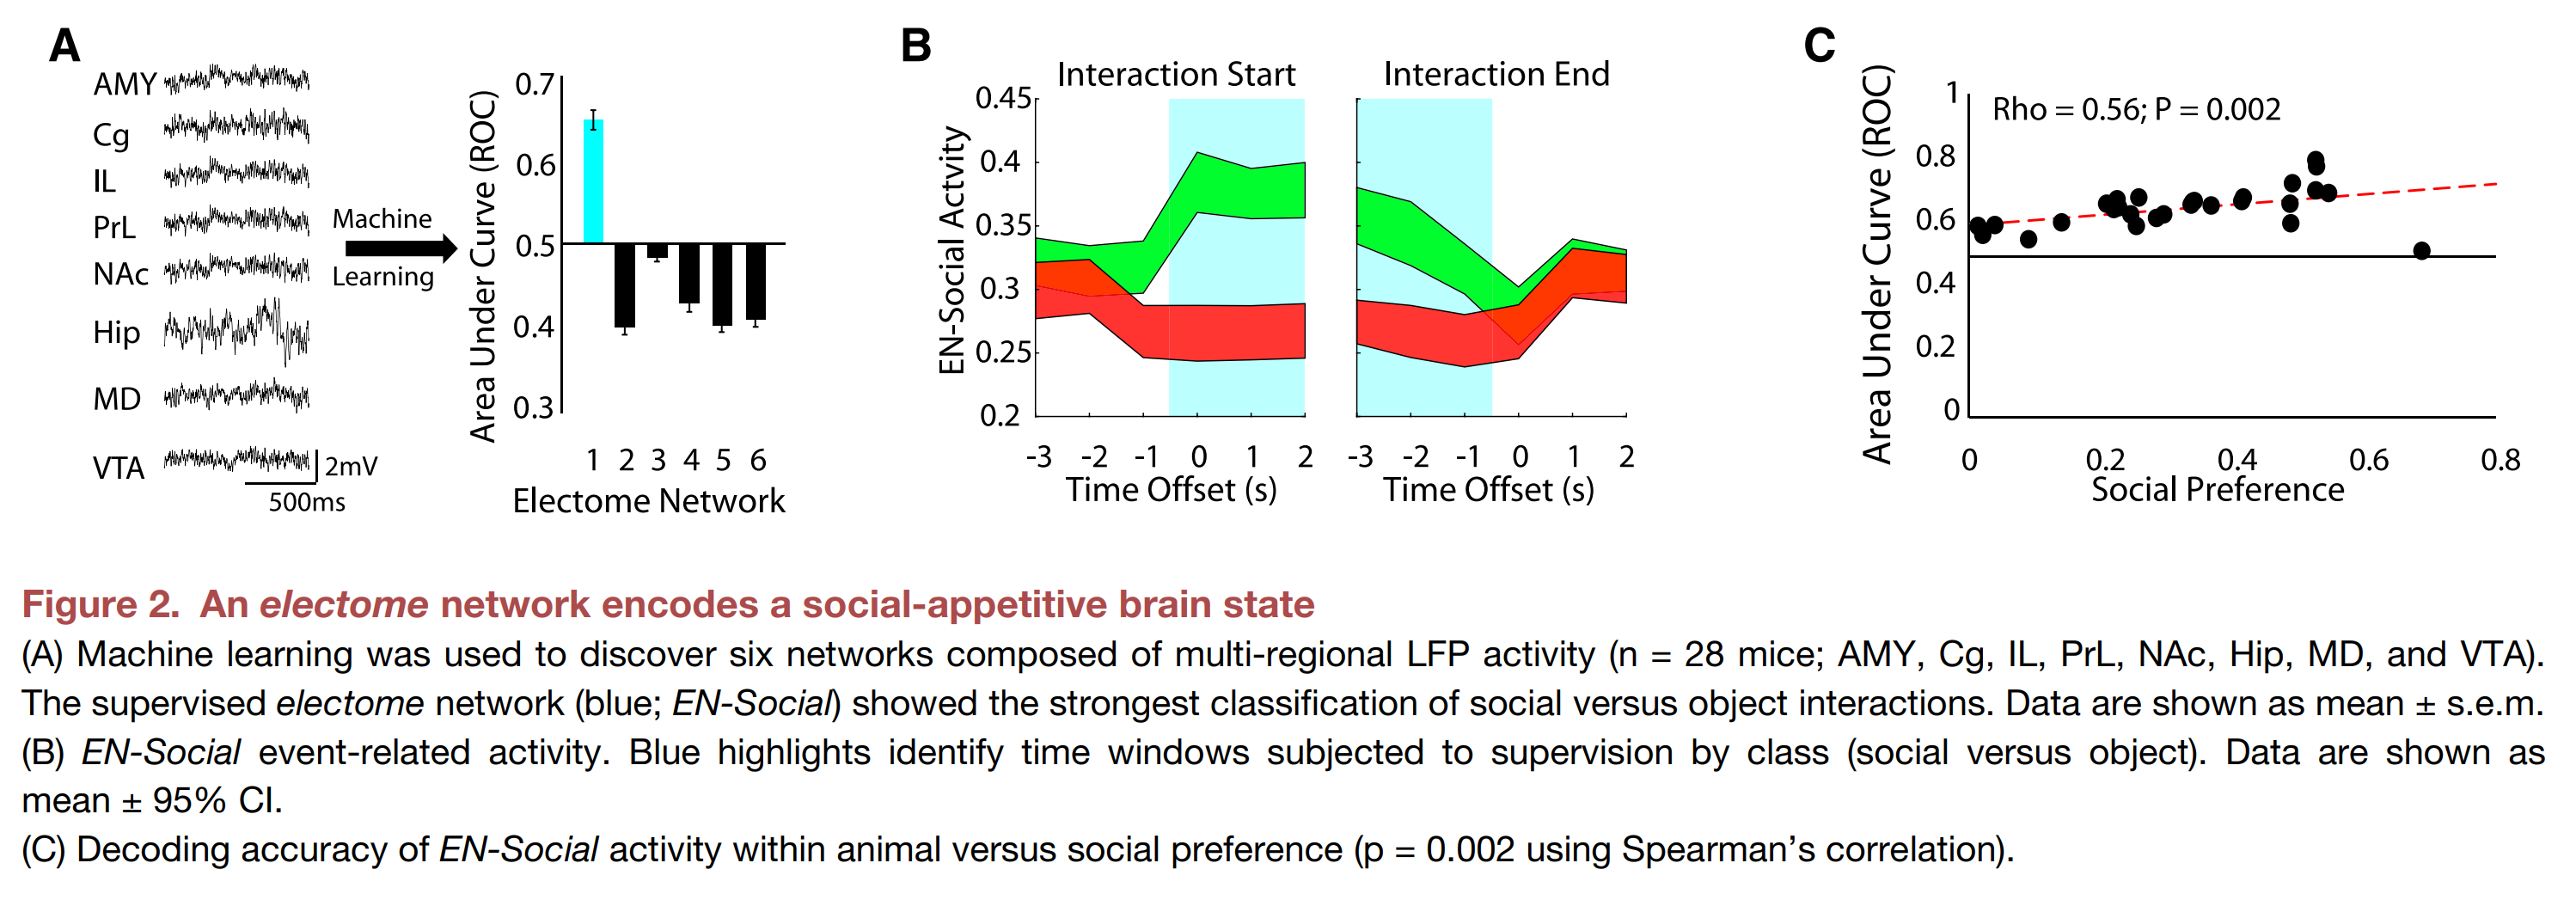